<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Theories_of_rate_constants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theories of Rate Constants
We have thus far used rate constants without questioning their magnitude. We remedy this oversight here.

## Arrhenius Equation
[Svante Arrhenius](https://en.wikipedia.org/wiki/Svante_Arrhenius) came up with an equation for calculating rate constants in 1889. It is related to the van 't Hoff equation for the temperature dependence of the equilibrium constant. Called the [Arrhenius equation](https://en.wikipedia.org/wiki/Arrhenius_equation), it is taught in general chemistry and introduces the concept of activation energy.
$$k=Ae^{-E_a/k_BT}$$

One can think of $A$ as the frequency of *attempts* at reaction and the exponential as the fraction of attempts that have sufficient energy to react. 

The Arrhenius equation has vast applicability to chemical reactions and has been applied to frequencies of cricket chirps and other phenomena of biological orgins. Regardless of Arrhenius' work to connect his work to theory, today we usually consider the equation to be empirical.

$$\require{mhchem}$$  $$\require{chemfig}$$ 
## Collision theory
Collision theory is based on the simple idea that a collision is necessary to cause a reaction. Let's use this idea to successively more accurately calculate the rate of an elementary step $$\ce{A + B -> P}$$

**Assumption 1:**
Assume every collision leads to reaction.

This would mean that the rate is equal to the collision frequency.

$$\begin{align*}-\dfrac{d[A]}{dt}&=k[A][B]\\&=Z_{AB}=\dfrac{N_A}{V}\dfrac{N_B}{V}\sigma\left(\dfrac{8k_BT}{\pi\mu}\right)^\frac{1}{2}\\&=\sigma \left<v_r\right>[A][B]\end{align*}$$

In this scenario, the rate constant would be the cross-sectional area multiplied by the average relative velocity.
$$k=\sigma\left<v_r\right>$$

Is it reasonable that *all* collisions lead to a reaction?

It seems that our assumption is too generous. We need to exclude collisions that are not energetic enough.

**Assumption 2:** Assume every collision with sufficient $v_r$ leads to collision.

We can start over with our new assumption or we can modify our previous result to fit our new assumption. Let's do the latter. 

Our previous result includes the cross-sectional area as well as the average relative velocity. What if we imagined that the cross-sectional area is a function of velocity. Not actually but conceptually. We could imagine that the effective cross-sectional area of our molecule is zero if it's not colliding with sufficient energy. It's *as if* our molecule has no size for the purpose of the reaction rate if its relative velocity is too small.

$$k=\sigma(v_r)v_r$$

Now that makes things difficult since every molecule gets a different $k$. Instead of worrying about each different $k$, let's calculate an average $k$.

$$\left<k\right>=\int^\infty_0 k(v_r) f(v_r) dv_r $$

$f(v_r)$ is the Maxwell-Boltzmann distribution. $\sigma(v_r)$ is 0 if $v_r<v_o$ and $\sigma(v_r)=\sigma$ otherwise.

Let's calculate this average k.

In [34]:
import sympy as sp
sp.init_printing()
kb=sp.symbols('k_B',positive=True, constant=True)
vr,vo,T,mu,sigma,Eo=sp.symbols('v_r v_o T mu sigma E_o',positive=True)

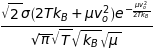

In [35]:
sp.integrate(sigma*vr*sp.sqrt(mu/(2*sp.pi*kb*T))**3*4*sp.pi*vr**2*sp.exp(-mu*vr**2/(2*kb*T)),(vr,vo,sp.oo)).simplify()

Let's change from velocity to kinetic energy where $E_o$ corresponds to the energy at $v_o$.

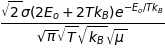

In [36]:
_.subs(vo**2,2*Eo/mu)

Rearranged this gives us $$\begin{align*}\left<k\right>&=\left[\sigma \left(\dfrac{8k_BT}{\pi \mu}\right)^{1/2}\left(\dfrac{E_o}{k_B T}+1\right)\right]e^{-\frac{E_o}{k_BT}}\\&=\left[\sigma \left<v_r\right>\left(\dfrac{E_o}{k_B T}+1\right)\right]e^{-\frac{E_o}{k_BT}}\end{align*}$$

This gets us something very Arrhenius-like. The exponential is just like Arrhenius if the $E_o$ is $E_a$. The bracketed factor is not a constant as in Arrhenius but its temperature dependence is quite weak having both $\sqrt T$ and 1/$\sqrt T$ dependent terms.

The relative velocity in this treatement does not take into account direct hits vs. glancing blows. That is our next correction.

**Assumption 3:** Assume every collision with sufficient $v_{lc}$ leads to collision.

This is very similar to the previous assumption but we replace relative velocity which just takes into account the velocity in the direction of the collision with velocity directed along the line between the centers of the two molecules.

As the angle between the relative velocity vector and the velocity along the line of centers vector approaches 0$^\circ$, we have a direct hit. As that angle reaches 90$^\circ$, we have a grazing collision.

The result is $$\left<k\right>=\left[\left<v_r\right>\sigma\right]e^{-E_o/kT}$$ which just removes one term from the previous result. This gets us superficially very close to our original result where all collisions lead to reactions with the addition of just the exponential term.

This result is probably close for atom-atom reactions but for molecules, which need to have the orientation of the collisions correct, this is still an over-estimation.

**Assumption 3:** Assume every collision with sufficient $v_{lc}$ leads to collision if the orientation is correct.

We will not try to derive anything here but simply multipy by the fraction of the surface that is active to reaction, P.

$$\left<k\right>=\left[P\left<v_r\right>\sigma\right]e^{-E_o/kT}$$ 

## Transition State Theory/Activated Complex Theory